In [2]:
%matplotlib inline

# Exercise 09: Web Scraping Wikipedia

I would like you to examine whether or not there is a linear correlation between the size of a US state and the year it was admitted to the union.

Objectives: 
+ Scraping a table from a webpage
+ Storing that data in a dataframe
+ Performing a linear regression on that data

## Part A
Using the URL I've provided below, I want you to scrape:
1. The name of each state
2. The year of admittance for each state
3. The land area for each state

Examine the URL to the webpage I've provided using your browser's element inspector to determine how to parse the relavent table.  

Store the data collected in a Pandas' DataFrame.

## Part B
Once you have scraped the necessary data, I would like you to perform a linear regression on the year of admittance for each state (x-axis) against the land area of each state (y-axis) using the Linear Regression model from scikit learn.

You may use the [API reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [this example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) to assist you with your regression.

Plot the data points and regression line.  Print out the coefficients, mean squared error, and $r^2$ values of this model.


In [3]:
import urllib
import matplotlib.pylab as plt
from bs4 import BeautifulSoup
import bs4
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [4]:
wiki_url='https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'
with urllib.request.urlopen(wiki_url) as response:
    territory = bs4.BeautifulSoup(response)
    

In [5]:
territory.title

<title>List of states and territories of the United States - Wikipedia</title>

In [6]:
all_tables = territory.find_all('table')

In [7]:
len(all_tables)

18

In [8]:
states_table = territory.findAll('table',
                           {'class':'wikitable sortable plainrowheaders'})
len(states_table)

4

In [9]:
states_table[0]


<table class="wikitable sortable plainrowheaders" style="text-align: center;">
<caption>States of the United States of America
</caption>
<tbody><tr>
<th colspan="2" rowspan="2" scope="col">Flag, name and<br/><a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a><sup class="reference" id="cite_ref-USPSabbreviations_14-0"><a href="#cite_note-USPSabbreviations-14">[12]</a></sup>
</th>
<th colspan="2" scope="col">Cities
</th>
<th rowspan="2" scope="col">Ratification or<br/>admission<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[C]</a></sup>
</th>
<th rowspan="2" scope="col">Population<br/><sup class="reference" id="cite_ref-17"><a href="#cite_note-17">[D]</a></sup><sup class="reference" id="cite_ref-AnnualEstUS_18-0"><a href="#cite_note-AnnualEstUS-18">[14]</a></sup>
</th>
<th colspan="2" scope="col">Total area<sup class="reference" id="cite_ref-areameasurements_19-0"><a href="#cite_note-aream

In [10]:
import requests

In [11]:
states = states_table[0].findAll('a')
states

[<a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a>,
 <a href="#cite_note-USPSabbreviations-14">[12]</a>,
 <a href="#cite_note-16">[C]</a>,
 <a href="#cite_note-17">[D]</a>,
 <a href="#cite_note-AnnualEstUS-18">[14]</a>,
 <a href="#cite_note-areameasurements-19">[15]</a>,
 <a href="#cite_note-areameasurements-19">[15]</a>,
 <a href="#cite_note-areameasurements-19">[15]</a>,
 <a href="/wiki/List_of_United_States_congressional_districts" title="List of United States congressional districts">Number<br/>of Reps.</a>,
 <a href="#cite_note-State_and_Local_Government_Finances_and_Employment-20">[16]</a>,
 <a href="/wiki/Alabama" title="Alabama">Alabama</a>,
 <a href="/wiki/Montgomery,_Alabama" title="Montgomery, Alabama">Montgomery</a>,
 <a href="/wiki/Birmingham,_Alabama" title="Birmingham, Alabama">Birmingham</a>,
 <a href="/wiki/Alaska" title="Alaska">Alaska</a>,
 <a href="/wiki/Juneau,_Alaska" title="Juneau

In [12]:
table_rows = states_table[0].find_all('tr')
table_rows

[<tr>
 <th colspan="2" rowspan="2" scope="col">Flag, name and<br/><a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a><sup class="reference" id="cite_ref-USPSabbreviations_14-0"><a href="#cite_note-USPSabbreviations-14">[12]</a></sup>
 </th>
 <th colspan="2" scope="col">Cities
 </th>
 <th rowspan="2" scope="col">Ratification or<br/>admission<sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[C]</a></sup>
 </th>
 <th rowspan="2" scope="col">Population<br/><sup class="reference" id="cite_ref-17"><a href="#cite_note-17">[D]</a></sup><sup class="reference" id="cite_ref-AnnualEstUS_18-0"><a href="#cite_note-AnnualEstUS-18">[14]</a></sup>
 </th>
 <th colspan="2" scope="col">Total area<sup class="reference" id="cite_ref-areameasurements_19-0"><a href="#cite_note-areameasurements-19">[15]</a></sup>
 </th>
 <th colspan="2" scope="col">Land area<sup class="reference" id="cite_ref-areameasurements_19-1">

In [56]:
master_list = []
for n in range(len(table_rows)):
    col = table_rows[n].find_all('td')
    sublist = []
    for i in col:
        sublist.append(i.text.strip())
        master_list.append(sublist)
final = set([tuple(x) for x in master_list])
final = list(final)

<td>AL
</td> AL
<td><a href="/wiki/Montgomery,_Alabama" title="Montgomery, Alabama">Montgomery</a>
</td> Montgomery
<td><a href="/wiki/Birmingham,_Alabama" title="Birmingham, Alabama">Birmingham</a>
</td> Birmingham
<td><span data-sort-value="000000001819-12-14-0000" style="white-space:nowrap">Dec 14, 1819</span>
</td> Dec 14, 1819
<td><span style="float:right;">4,903,185</span>
</td> 4,903,185
<td data-sort-value="7011135767358042980" style="text-align:right;">52,420
</td> 52,420
<td data-sort-value="7011135767358042980" style="text-align:right;">135,767
</td> 135,767
<td data-sort-value="7011131170802544043" style="text-align:right;">50,645
</td> 50,645
<td data-sort-value="7011131170802544043" style="text-align:right;">131,171
</td> 131,171
<td data-sort-value="7009459655549893771" style="text-align:right;">1,775
</td> 1,775
<td data-sort-value="7009459655549893771" style="text-align:right;">4,597
</td> 4,597
<td><span style="float:right;">7</span>
</td> 7
<td>AK
</td> AK
<td><a hre

In [63]:
import numpy as np
nosubrow = []
for m in final:
    m = np.array(m)
    if len(m) == 12:
        nosubrow.append(m[[0,3,7]])
    else:
        nosubrow.append(m[[0,2,6]])

In [73]:
df1 = pd.DataFrame(data = nosubrow, columns = ['state name','admittance','land area'])

In [74]:
df1.sort_values('state name')

,state name,admittance,land area
0,AK,"Jan 3, 1959","570,641"
16,AL,"Dec 14, 1819","50,645"
39,AR,"Jun 15, 1836","52,035"
29,AZ,"Feb 14, 1912","113,594"
27,CA,"Sep 9, 1850","155,779"
35,CO,"Aug 1, 1876","103,642"
9,CT,"Jan 9, 1788","4,842"
3,DE,"Dec 7, 1787","1,949"
32,FL,"Mar 3, 1845","53,625"
40,GA,"Jan 2, 1788","57,513"


In [75]:
df1['land area'] = df1['land area'].str.replace(',', '').astype(float)
df1['admittance'] = df1['admittance'].str.replace(',', '').astype(str)
df1['admittance'] = pd.to_datetime(df1['admittance'], format='%b %d %Y')
df1['admittance_year']= df1['admittance'].dt.year
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   state name       50 non-null     object        
 1   admittance       50 non-null     datetime64[ns]
 2   land area        50 non-null     float64       
 3   admittance_year  50 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [76]:
print (df1['admittance_year'])

0     1959
1     1959
2     1796
3     1787
4     1816
5     1912
6     1787
7     1845
8     1867
9     1788
10    1803
11    1863
12    1788
13    1820
14    1790
15    1896
16    1819
17    1788
18    1812
19    1889
20    1889
21    1788
22    1846
23    1890
24    1858
25    1817
26    1890
27    1850
28    1788
29    1912
30    1821
31    1889
32    1845
33    1787
34    1907
35    1876
36    1818
37    1864
38    1861
39    1836
40    1788
41    1788
42    1859
43    1789
44    1837
45    1791
46    1889
47    1848
48    1788
49    1792
Name: admittance_year, dtype: int64


Coefficients: 
 [986.61722517]
Mean squared error: 5032889913.14
Coefficient of determination: 0.30


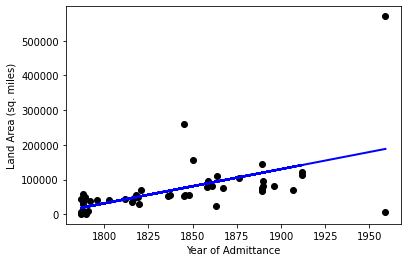

In [104]:
# create linear regression model
# create x and y
land = np.array(pd.to_numeric(df1['land area'] ,downcast = 'integer'))

y = land
x = np.reshape(np.array(df1["admittance_year"]),(-1,1))

#print (x,y)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

# Make predictions
pred = model.predict(x)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, pred, color='blue', linewidth=2)
plt.xlabel('Year of Admittance')
plt.ylabel('Land Area (sq. miles)')

plt.show()

In [ ]:
# Clearly it makes little sense to include the last two data
# points in the regression (AK and HI) ... let's remove them and do
# the regression over again.

In [107]:
df1 = df1.drop([0, 1])

Coefficients: 
 [684.92161604]
Mean squared error: 1334322806.18
Coefficient of determination: 0.38


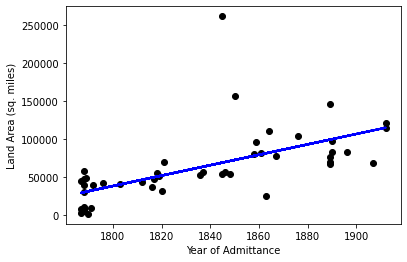

In [108]:
y = df1["land area"]
x = np.reshape(np.array(df1["admittance_year"]),(-1,1))

#print (x,y)

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

# Make predictions
pred = model.predict(x)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, pred, color='blue', linewidth=2)
plt.xlabel('Year of Admittance')
plt.ylabel('Land Area (sq. miles)')

plt.show()